In [41]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

__torch_version__ = torch.__version__
__torch_version__ 

Using device: cuda


'2.7.1+cu128'

In [2]:
W = .7
B = .2

X = torch.arange(0,1,0.02).unsqueeze_(1)
X.shape

torch.Size([50, 1])

In [3]:
Y = W * X + B


In [4]:
Y.shape

torch.Size([50, 1])

### Data Split

In [5]:
split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

### Data visualize

In [6]:
def visualze_data(X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, Pred=None):
    plt.scatter(X_train.numpy(), Y_train.numpy(), label = "Training Data", c="b")
    plt.scatter(X_test.numpy(), Y_test.numpy(), label = "Test Data", c="r")
    if Pred is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(X_test.numpy(), Pred.numpy(), c="r", s=4, label="Predictions")
    plt.title("Training and Testing Data Visualized")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


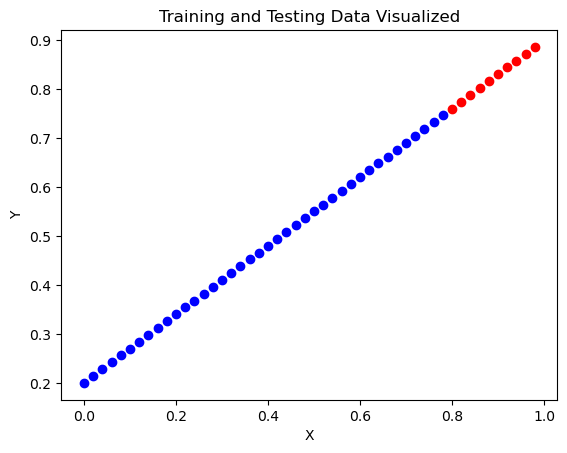

In [7]:
visualze_data(X_train, Y_train, X_test, Y_test)

### Build the model

In [8]:
class LinearRegression(nn.Module):
    def __init__(self):

        super().__init__() # inintialize the parent class nn.Module

        # tells PyTorch that these are trainable parameters of the model,
        # req_grad is set to true by default
        self.weights = nn.Parameter(torch.randn(1, 1, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, 1, dtype=torch.float32))

    def forward(self, X):
        return self.weights * X + self.bias

In [9]:
torch.manual_seed(42)

model = LinearRegression()

list(model.parameters())

[Parameter containing:
 tensor([[0.3367]], requires_grad=True),
 Parameter containing:
 tensor([[0.1288]], requires_grad=True)]

In [10]:
model.state_dict()      # what the model contains

OrderedDict([('weights', tensor([[0.3367]])), ('bias', tensor([[0.1288]]))])

In [11]:
# make predictions
with torch.inference_mode():  # turns off gradient tracking
    y_preds = model(X_test)

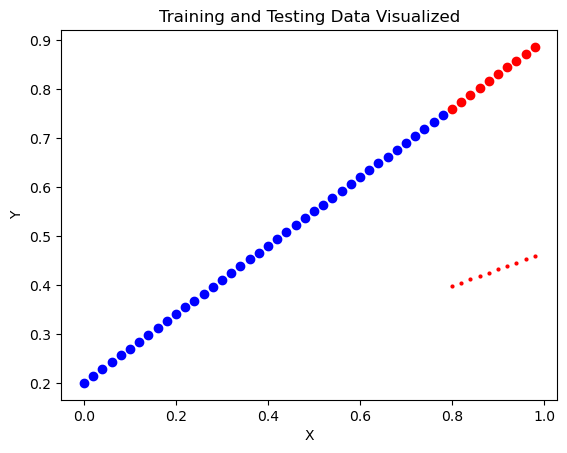

In [13]:
visualze_data(Pred=y_preds)

In [14]:
model.state_dict()

OrderedDict([('weights', tensor([[0.3367]])), ('bias', tensor([[0.1288]]))])

### Build with nn.linear

In [42]:
class linear_reg_nn(nn.Module):
    def __init__(self):
        super().__init__()
        # since our model has one input and one output feature
        # includes w and bias
        self.linear_layer  = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)

In [44]:
model_2 = linear_reg_nn()
list(model_2.parameters())

[Parameter containing:
 tensor([[-0.4869]], requires_grad=True),
 Parameter containing:
 tensor([0.5873], requires_grad=True)]

In [45]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4869]])),
             ('linear_layer.bias', tensor([0.5873]))])

## Training Loop

In [31]:
loss_fn_1 = nn.MSELoss()
loss_fn_2 = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [32]:
torch.manual_seed(42)

epochs = 100

train_l = []
test_l = []
epoch_count = []

for epoch in range(epochs):

# model in training mode
    model.train()
    Y_pred = model(X_train) 

    train_loss = loss_fn_2(Y_train, Y_pred)
    
    # Clears old gradients stored in each parameter.
    optimizer.zero_grad()
    train_loss.backward()
    # updates the parameter values
    optimizer.step()

# model in eval mode
    model.eval()

    with torch.inference_mode():
        Y_pred = model(X_test)

        test_loss = loss_fn_2(Y_test, Y_pred)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
            print(f"Model state dict: {model.state_dict()}")
            epoch_count.append(epoch)

            # convert to numpy the copy of the tensor that is disconnected 
            # from the computation graph.
            # for scaler, we can also use .item() instead of .detach().numpy()
            train_l.append(train_loss.detach().numpy())
            test_l.append(test_loss.detach().numpy())


Epoch: 0 | Train Loss: 0.0400 | Test Loss: 0.0693
Model state dict: OrderedDict([('weights', tensor([[0.6185]])), ('bias', tensor([[0.2033]]))])
Epoch: 10 | Train Loss: 0.0116 | Test Loss: 0.0268
Model state dict: OrderedDict([('weights', tensor([[0.6437]])), ('bias', tensor([[0.2233]]))])
Epoch: 20 | Train Loss: 0.0082 | Test Loss: 0.0185
Model state dict: OrderedDict([('weights', tensor([[0.6609]])), ('bias', tensor([[0.2163]]))])
Epoch: 30 | Train Loss: 0.0048 | Test Loss: 0.0102
Model state dict: OrderedDict([('weights', tensor([[0.6780]])), ('bias', tensor([[0.2093]]))])
Epoch: 40 | Train Loss: 0.0014 | Test Loss: 0.0048
Model state dict: OrderedDict([('weights', tensor([[0.6943]])), ('bias', tensor([[0.2003]]))])
Epoch: 50 | Train Loss: 0.0081 | Test Loss: 0.0063
Model state dict: OrderedDict([('weights', tensor([[0.6942]])), ('bias', tensor([[0.1988]]))])
Epoch: 60 | Train Loss: 0.0081 | Test Loss: 0.0063
Model state dict: OrderedDict([('weights', tensor([[0.6942]])), ('bias', t

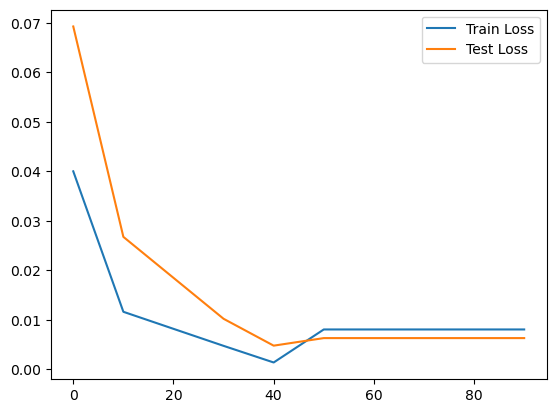

In [34]:
plt.plot(epoch_count, train_l, label='Train Loss')
plt.plot(epoch_count, test_l, label='Test Loss')
plt.legend()
plt.show()

In [35]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {W}, bias: {B}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([[0.6981]])), ('bias', tensor([[0.2088]]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.2


### Make predictions

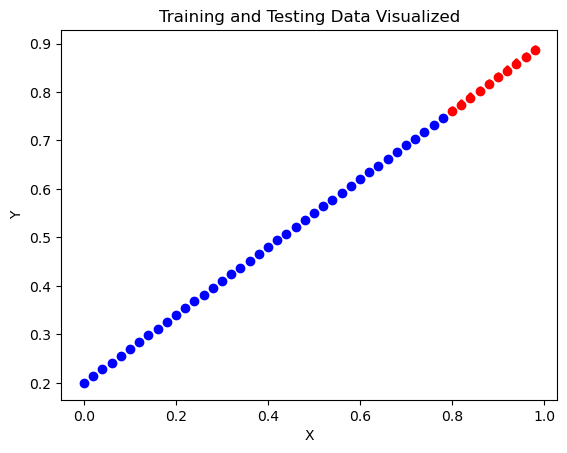

In [36]:
model.eval()
with torch.inference_mode():
    y_p = model(X_test)

visualze_data(Pred=y_p)

### Saving models

In [37]:
from pathlib import Path

model_dir = Path("models")
model_dir.mkdir(parents=True, exist_ok=True)

model_path = model_dir / "linear_regression_model.pth"
print(f"Saving model to: {model_path}")

# save only the parameters to make things more flexible
# we can also save entire model using torch.save(model, model_path) but
# that is not reccommended as it might break due to change in file structure
torch.save(model.state_dict(), model_path) 

Saving model to: models\linear_regression_model.pth


### Load model

In [38]:
model = LinearRegression()      # We instantiate the model again because what we saved 
                                # are just the learned weights, not the full model class definition.
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [39]:
model.eval()

LinearRegression()

In [40]:
model.state_dict()

OrderedDict([('weights', tensor([[0.6981]])), ('bias', tensor([[0.2088]]))])